### In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
#Import all the necessary libraries
import numpy as np
from scipy import stats
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.api import qqplot

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
c:\users\leo26\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [3]:
series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, nrows=36, squeeze=True, date_parser=parser)

series.head()


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

#### Examine the data

In [4]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

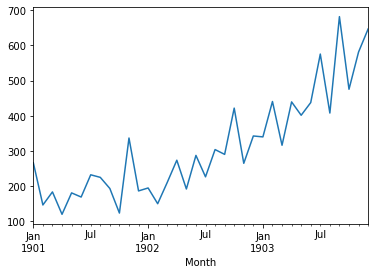

In [5]:
# show plots in the notebook
series.plot()

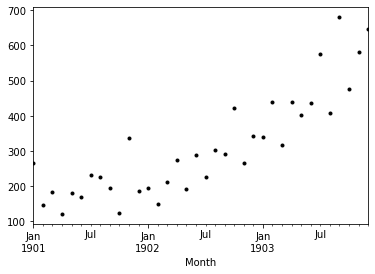

In [6]:
#Let us plot the scatter plot

series.plot(style='k.')
plt.show()

#### From the above plot, it appears that the shampoo sales data is not stationary and there appears a clear trend. 

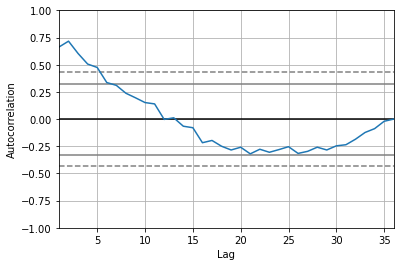

In [7]:
#Let's check the autocorrelation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

In [8]:
sm.stats.durbin_watson(series)

0.09548538187456361

#### There appears to be a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

### ARIMA

In [9]:
#Let's use p = 5(from the plot above), d = 1 and q = 0 (moving average)

model = ARIMA(series, order=(5,1,0))
model_fit=model.fit()
print(model_fit.summary())

c:\users\leo26\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\leo26\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Tue, 06 Oct 2020   AIC                            406.340
Time:                                                 23:46:17   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

                0
count   35.000000
mean    -5.495213
std     68.132882
min   -133.296617
25%    -42.477893
50%     -7.186560
75%     24.748338
max    133.237964


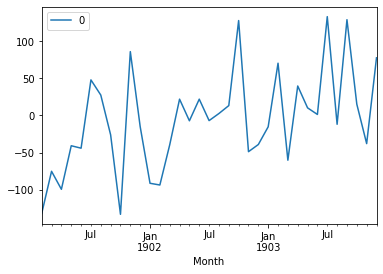

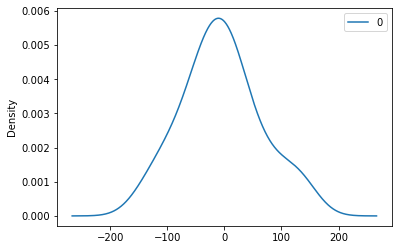

In [10]:
#Let's plot residual errors

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

##### We get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

In [11]:
# Let's now forecast the future sales

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    


predicted=349.117696, expected=342.300000
predicted=306.512946, expected=339.700000
predicted=387.376426, expected=440.400000
predicted=348.154199, expected=315.900000
predicted=386.308784, expected=439.300000
predicted=356.082031, expected=401.300000
predicted=446.379465, expected=437.400000
predicted=394.737266, expected=575.500000
predicted=434.915517, expected=407.600000
predicted=507.923424, expected=682.000000
predicted=435.482893, expected=475.300000
predicted=652.743809, expected=581.300000
predicted=546.343424, expected=646.900000


In [12]:
#Check the error
     
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6958.328


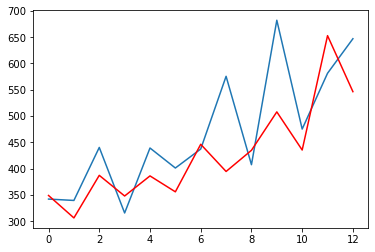

In [13]:
from matplotlib import pyplot

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()